# Sesión 3




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Perfil logarítmico
$$\frac{U(z)}{U(z_r)}=\frac{\textrm{ln}\big(\frac{z}{z_0}\big)}{\textrm{ln}\big(\frac{z_r}{z_0}\big)}$$

U = velocidades 

z = altura (que buscamos)

$z_r$ = altura de referencia

$z_0$ = rugosidad

$$U(z)=U(z_r)\frac{\textrm{ln}\big(\frac{z}{z_0}\big)}{\textrm{ln}\big(\frac{z_r}{z_0}\big)}$$

In [2]:
def perfil_log(U_zr, zr, z, z0):
  return(U_zr*((np.log(z/(z0/1000)))/np.log(zr/(z0/1000))))

In [5]:
perfil_log(4.5,10,20,3000)

7.090724891220502

In [ ]:
perfil_log(1.5, 10, 20, 0.01) # muy suave

1.5752574989159953

In [ ]:
perfil_log(1.5, 10, 20, 100) #algunos árboles 

1.7257724967479855

In [ ]:
height = np.arange(10,101,10)

In [ ]:
height

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [ ]:
vel_z1 = perfil_log(1.5, 10, height, 0.01)

In [ ]:
vel_z2 = perfil_log(1.5, 10, height, 100) 

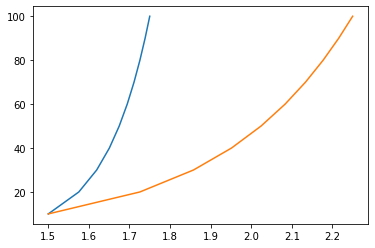

In [ ]:
plt.plot(vel_z1, height)
plt.plot(vel_z2, height)

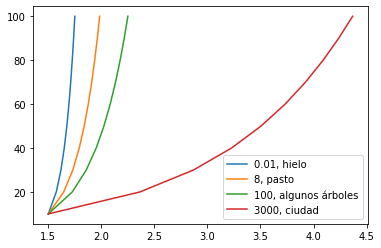

In [ ]:
plt.plot(perfil_log(1.5, 10, height, 0.01), height, label="0.01, hielo")
plt.plot(perfil_log(1.5, 10, height, 8), height, label="8, pasto")
plt.plot(perfil_log(1.5, 10, height, 100), height, label="100, algunos árboles")
plt.plot(perfil_log(1.5, 10, height, 3000), height, label="3000, ciudad")

plt.legend()

# Perfil por potencias
$$\frac{U(z)}{U(z_r)}=\big(\frac{z}{z_r}\big)^\alpha$$

$$U(z_r)=U(z_r)\big(\frac{z}{z_r}\big)^\alpha$$

In [ ]:
def perfil_pot(U_zr, zr, z):
  return(U_zr*(z/zr)**(1/7))  

In [ ]:
perfil_pot(1.5, 10, 20)

1.6561342705107185

In [ ]:
perfil_pot(1.5, 10, height)

array([1.5       , 1.65613427, 1.75489622, 1.82852048, 1.88774843,
       1.93756251, 1.98070387, 2.01885029, 2.05310716, 2.08424324])

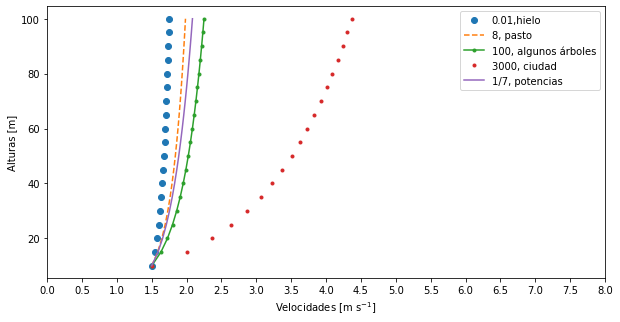

In [ ]:
height = np.arange(10,101,5)
plt.figure(figsize=(10,5))
plt.plot(perfil_log(1.5, 10, height, 0.01),height, "o",label="0.01,hielo")
plt.plot(perfil_log(1.5, 10, height, 8), height, '--',label="8, pasto")
plt.plot(perfil_log(1.5, 10, height, 100), height, '.-',label="100, algunos árboles")
plt.plot(perfil_log(1.5, 10, height, 3000), height, '.',label="3000, ciudad")

plt.plot(perfil_pot(1.5,10,height), height, label="1/7, potencias")
plt.xlim(0, 8)
plt.xticks(np.arange(0, 8.1, 0.5))
plt.xlabel("Velocidades [m s$^{-1}$]")
plt.ylabel("Alturas [m]")
plt.legend(loc="upper right")

In [ ]:
np.arange(0, 8.1, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. ])

In [ ]:
np.linspace(0,8, 20)

array([0.        , 0.42105263, 0.84210526, 1.26315789, 1.68421053,
       2.10526316, 2.52631579, 2.94736842, 3.36842105, 3.78947368,
       4.21052632, 4.63157895, 5.05263158, 5.47368421, 5.89473684,
       6.31578947, 6.73684211, 7.15789474, 7.57894737, 8.        ])

# Pandas

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving M02_201912.txt to M02_201912.txt


In [ ]:
datos = pd.read_csv("M02_201912.txt", sep=" ", usecols=[0,1,2,3,4,5, 13], skiprows=[0,1,2], header=None, parse_dates=[[0,1,2,3,4]])

In [ ]:
type(datos)

pandas.core.frame.DataFrame

In [ ]:
datos.head()

,0_1_2_3_4,5,13
0,2019 12 01 00 00,6.9167,5.3128
1,2019 12 01 00 10,5.6143,4.1181
2,2019 12 01 00 20,5.2918,4.0479
3,2019 12 01 00 30,6.1105,4.7368
4,2019 12 01 00 40,6.3958,4.8008


In [ ]:
datos.columns=["Date","Vel_80", "Vel_60"]

In [ ]:
datos.head()

,Date,Vel_80,Vel_60
0,2019 12 01 00 00,6.9167,5.3128
1,2019 12 01 00 10,5.6143,4.1181
2,2019 12 01 00 20,5.2918,4.0479
3,2019 12 01 00 30,6.1105,4.7368
4,2019 12 01 00 40,6.3958,4.8008


In [ ]:
datos.set_index("Date", inplace=True)

In [ ]:
datos.head()

,Vel_80,Vel_60
Date,,
2019 12 01 00 00,6.9167,5.3128
2019 12 01 00 10,5.6143,4.1181
2019 12 01 00 20,5.2918,4.0479
2019 12 01 00 30,6.1105,4.7368
2019 12 01 00 40,6.3958,4.8008


In [ ]:
datos.index

Index(['2019 12 01 00 00', '2019 12 01 00 10', '2019 12 01 00 20',
       '2019 12 01 00 30', '2019 12 01 00 40', '2019 12 01 00 50',
       '2019 12 01 01 00', '2019 12 01 01 10', '2019 12 01 01 20',
       '2019 12 01 01 30',
       ...
       '2019 12 31 22 30', '2019 12 31 22 40', '2019 12 31 22 50',
       '2019 12 31 23 00', '2019 12 31 23 10', '2019 12 31 23 20',
       '2019 12 31 23 30', '2019 12 31 23 40', '2019 12 31 23 50',
       '2020 01 01 00 00'],
      dtype='object', name='Date', length=4465)

https://strftime.org/

In [ ]:
datos.index = pd.to_datetime(datos.index, format="%Y %m %d %H %M")

In [ ]:
datos.head()

,Vel_80,Vel_60
Date,,
2019-12-01 00:00:00,6.9167,5.3128
2019-12-01 00:10:00,5.6143,4.1181
2019-12-01 00:20:00,5.2918,4.0479
2019-12-01 00:30:00,6.1105,4.7368
2019-12-01 00:40:00,6.3958,4.8008


In [ ]:
datos.index

DatetimeIndex(['2019-12-01 00:00:00', '2019-12-01 00:10:00',
               '2019-12-01 00:20:00', '2019-12-01 00:30:00',
               '2019-12-01 00:40:00', '2019-12-01 00:50:00',
               '2019-12-01 01:00:00', '2019-12-01 01:10:00',
               '2019-12-01 01:20:00', '2019-12-01 01:30:00',
               ...
               '2019-12-31 22:30:00', '2019-12-31 22:40:00',
               '2019-12-31 22:50:00', '2019-12-31 23:00:00',
               '2019-12-31 23:10:00', '2019-12-31 23:20:00',
               '2019-12-31 23:30:00', '2019-12-31 23:40:00',
               '2019-12-31 23:50:00', '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=4465, freq=None)

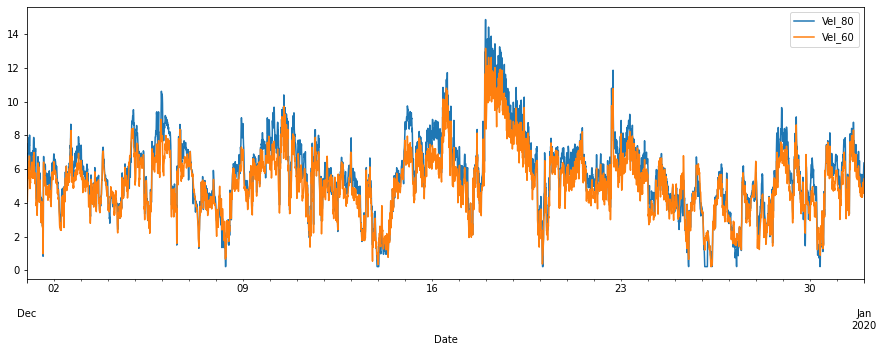

In [ ]:
datos.plot(figsize=(15,5))

(array([737394., 737398., 737402., 737406., 737410., 737414., 737418.,
        737422., 737425.]), <a list of 9 Text major ticklabel objects>)

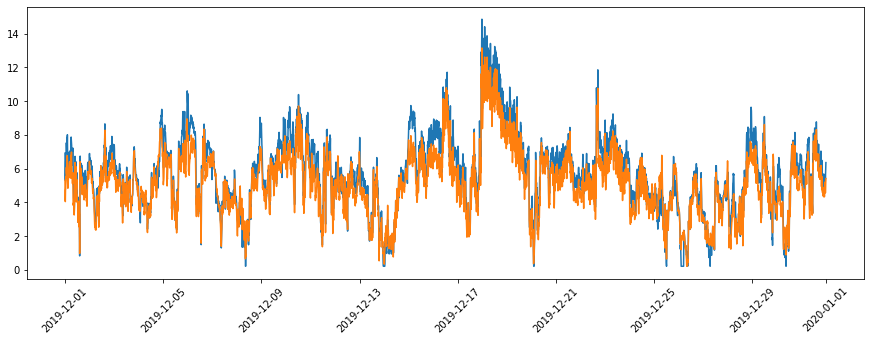

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(datos.Vel_80)
plt.plot(datos.Vel_60)
plt.xticks(rotation=45)

In [ ]:
datos.head(10)

,Vel_80,Vel_60
Date,,
2019-12-01 00:00:00,6.9167,5.3128
2019-12-01 00:10:00,5.6143,4.1181
2019-12-01 00:20:00,5.2918,4.0479
2019-12-01 00:30:00,6.1105,4.7368
2019-12-01 00:40:00,6.3958,4.8008
2019-12-01 00:50:00,6.6811,5.3314
2019-12-01 01:00:00,6.8857,5.5300
2019-12-01 01:10:00,6.8919,5.4431
2019-12-01 01:20:00,7.5307,6.0762


In [ ]:
datos.tail()

,Vel_80,Vel_60
Date,,
2019-12-31 23:20:00,5.6825,5.2197
2019-12-31 23:30:00,5.3787,4.5637
2019-12-31 23:40:00,5.7880,4.9652
2019-12-31 23:50:00,6.1539,5.1483
2020-01-01 00:00:00,6.3586,5.4121


In [ ]:
datos.describe()

,Vel_80,Vel_60
count,4465.000000,4465.000000
mean,5.690037,5.153837
std,2.228404,1.898526
min,0.218590,0.217340
25%,4.290200,3.947400
50%,5.657700,5.145200
75%,6.991200,6.268600
max,14.855000,13.151000


In [ ]:
datos.mean()

Vel_80    5.690037
Vel_60    5.153837
dtype: float64

In [ ]:
datos.median()

Vel_80    5.6577
Vel_60    5.1452
dtype: float64

In [ ]:
datos["Suma"] = datos.Vel_60 + datos.Vel_80

In [ ]:
datos.head()

,Vel_80,Vel_60,Suma
Date,,,
2019-12-01 00:00:00,6.9167,5.3128,12.2295
2019-12-01 00:10:00,5.6143,4.1181,9.7324
2019-12-01 00:20:00,5.2918,4.0479,9.3397
2019-12-01 00:30:00,6.1105,4.7368,10.8473
2019-12-01 00:40:00,6.3958,4.8008,11.1966


In [ ]:
perfil_pot(1.5,10,height)

In [ ]:
datos["Vel_100"] = perfil_pot(datos.Vel_60, 60, 100)

In [ ]:
datos["Vel_ext_80"] = perfil_pot(datos.Vel_60, 60, 80)

In [ ]:
datos.head()

,Vel_80,Vel_60,Suma,Vel_100,Vel_ext_80
Date,,,,,
2019-12-01 00:00:00,6.9167,5.3128,12.2295,5.714999,5.535691
2019-12-01 00:10:00,5.6143,4.1181,9.7324,4.429856,4.290869
2019-12-01 00:20:00,5.2918,4.0479,9.3397,4.354341,4.217724
2019-12-01 00:30:00,6.1105,4.7368,10.8473,5.095393,4.935526
2019-12-01 00:40:00,6.3958,4.8008,11.1966,5.164239,5.002211


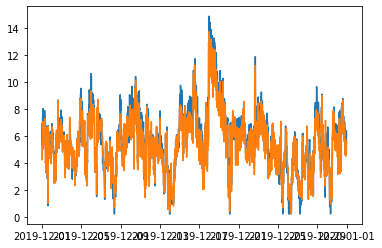

In [ ]:
plt.plot(datos.Vel_80)
plt.plot(datos.Vel_ext_80)